### qtl mapping
#### Redo of the analysis from [20200728](./20200728_rqtl_all_nodensfil_xo3mb_fill3mb_wscomposite_bs1e6_res10kb.ipynb)  
with fewer and more lenient filtering steps following Örjans recommendations from [docs summary](https://docs.google.com/document/d/1YMyT4N0tFm9sBJimVTUjBuYrvXS4r6qNxVGqtWJvW6w/edit?usp=sharing)  

**changes:**
- lower the individual threshold for removing markers going from <500 to <100?  
- do not filter for gtfreq
- remove low marker-individual filter  
- remove HWE filter
- made extra sure generation and dam are treated as factors, not numerical
- remove filter for mendeleian segregation
    

In [2]:
library("data.table")
library("qtl")

# inputs

In [3]:
genfile =  '../data/20200727_all_wscomposite_binsize1mb_3mbxo_3mbfill.csv'
phefile = '../data/20200727_intersection_phenotypes.csv'

In [4]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“2 individuals with genotypes but no phenotypes
    913407|910907
”

 --Read the following data:
	 3135  individuals
	 1088  markers
	 7  phenotypes
 --Cross type: f2 


In [5]:
summary(datf2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  70.8 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

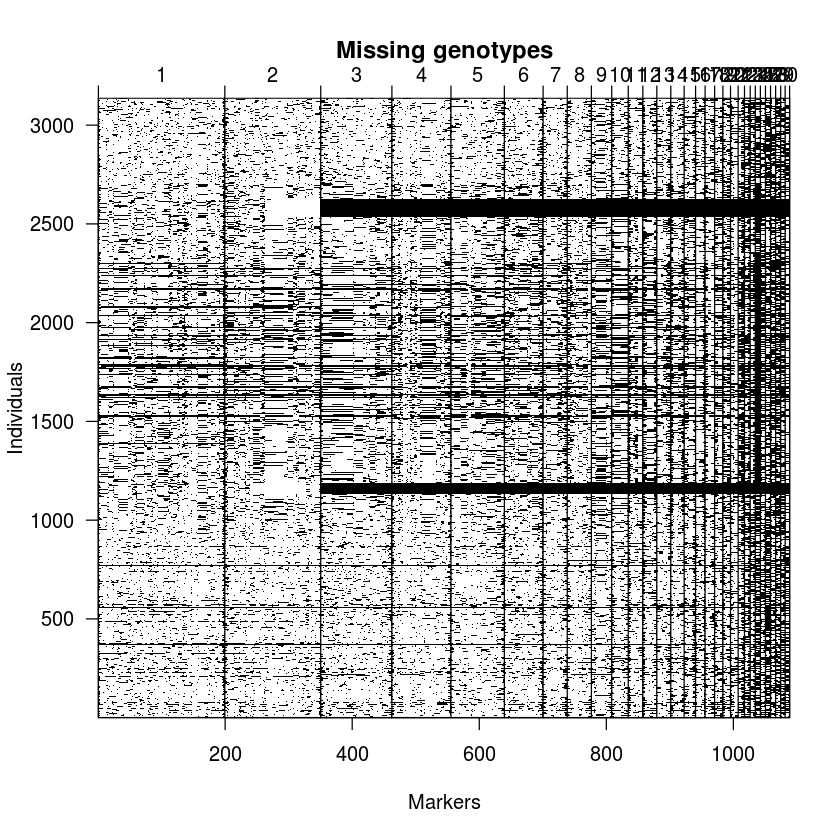

In [6]:
plotMissing(datf2)

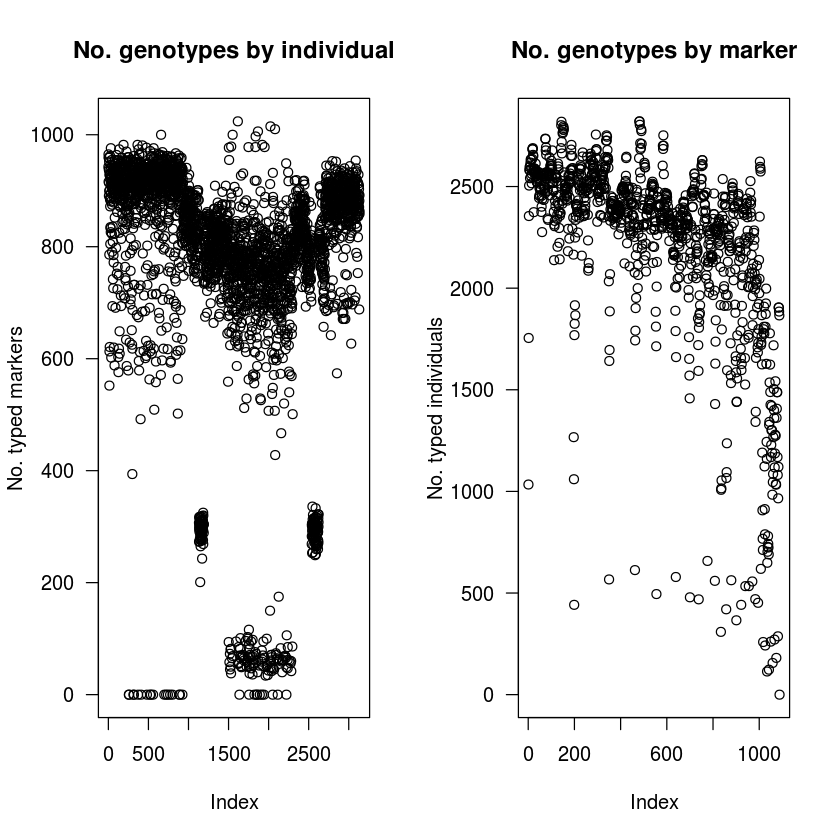

In [7]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [8]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 100])   # changed the filtering here


In [9]:
todrop

[1] "30-6"

In [10]:
datf2.1 <- drop.markers(datf2, todrop)

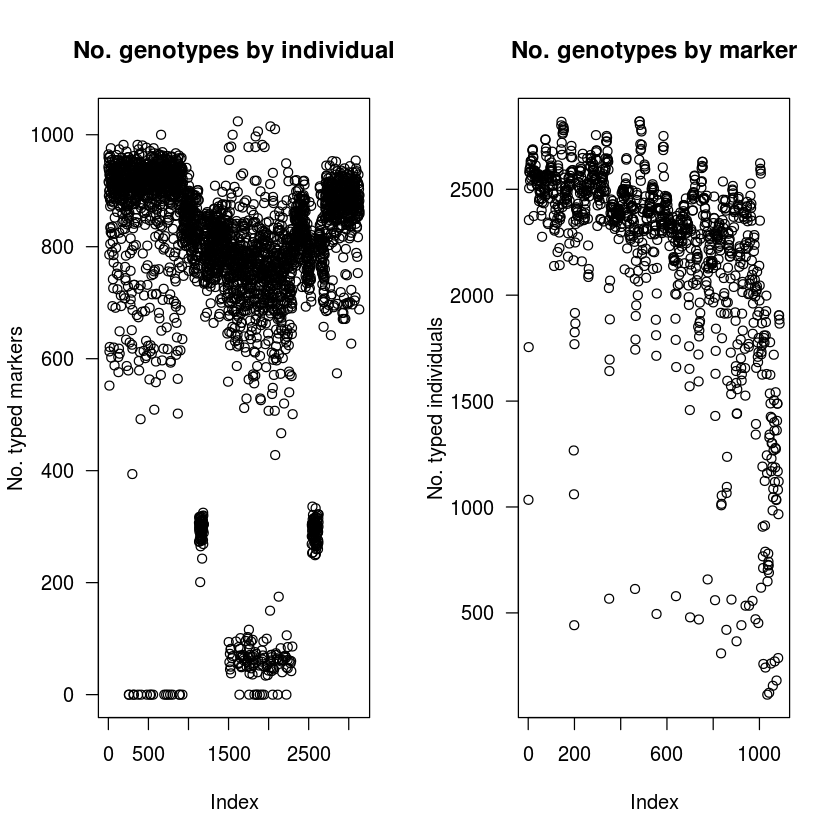

In [11]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [12]:
#datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>50)) # removing all individuals that have less than 5% of all markers
datf2.2 <- datf2.1 # do not remove low marker individuals

In [13]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 3135

[1] 3135

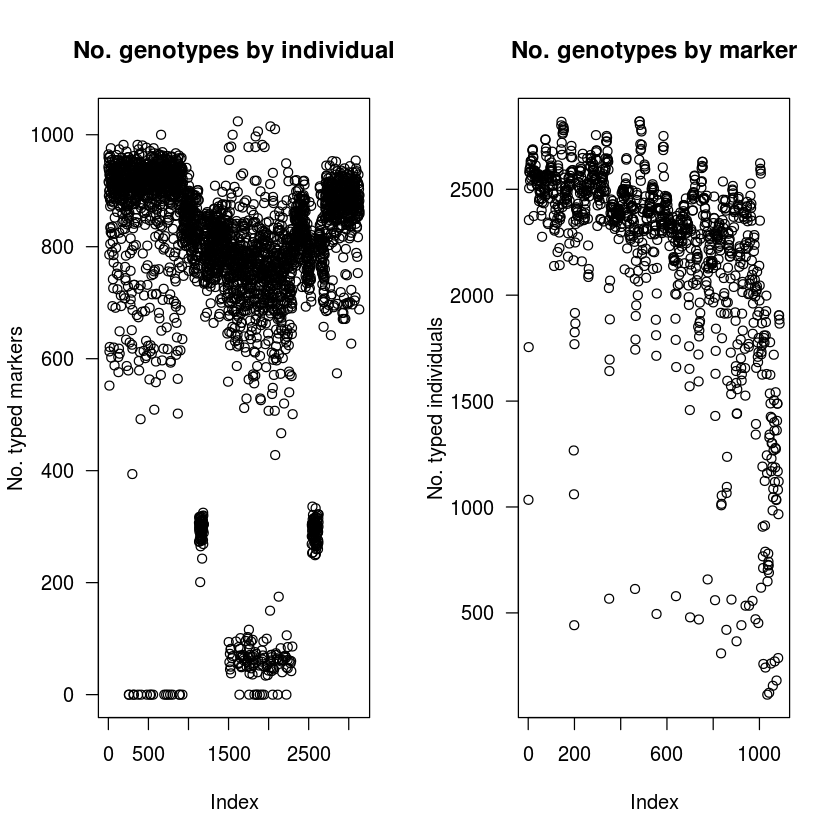

In [14]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [15]:
summary(datf2.2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1087 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 6 
    Percent genotyped:  70.9 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

In [16]:
cg <- comparegeno(datf2.2)

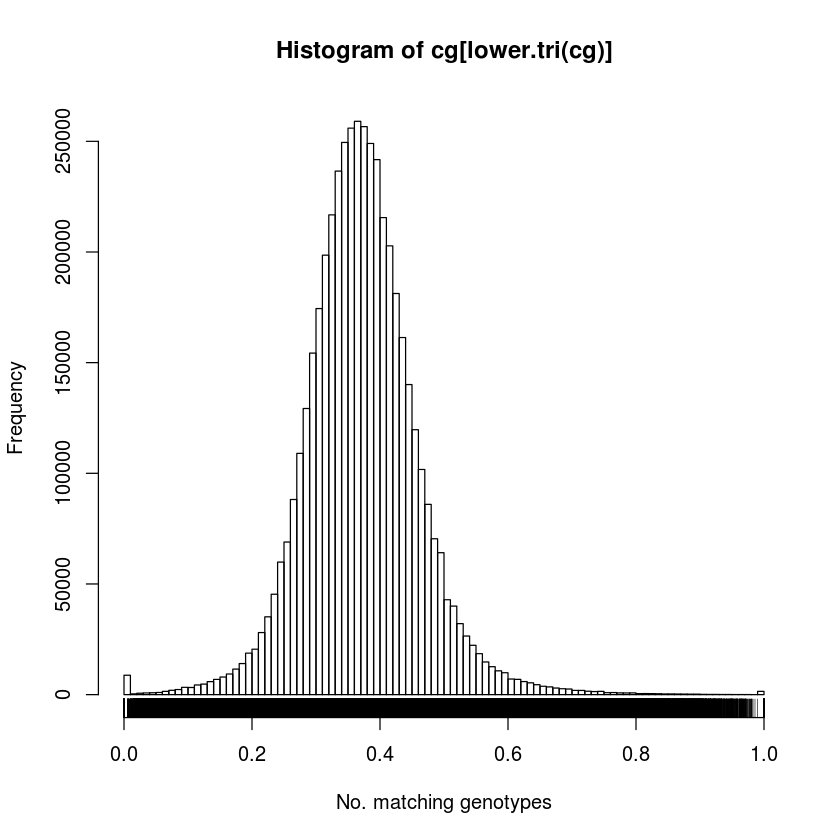

In [17]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [18]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [19]:
wh

row,col
368,538
515,538
7,682
112,682
368,682
538,682
538,851
682,851
689,851
368,874


In [20]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`1-3`
[1] "1-0" "1-1" "1-2"

$`1-194`
[1] "1-195" "1-196" "1-197" "1-198"

$`2-3`
[1] "2-0" "2-1" "2-2"

$`2-146`
[1] "2-147" "2-148" "2-149" "2-150"

$`3-3`
[1] "3-0" "3-1" "3-2"

$`3-107`
[1] "3-108" "3-109" "3-110" "3-111"

$`4-3`
[1] "4-0" "4-1" "4-2"

$`4-55`
[1] "4-56"

$`4-88`
[1] "4-89" "4-90" "4-91"

$`5-3`
[1] "4-92" "5-0"  "5-1"  "5-2" 

$`5-8`
[1] "5-9"

$`5-79`
[1] "5-80" "5-81" "5-82"

$`6-3`
[1] "5-83" "6-0"  "6-1"  "6-2" 

$`6-56`
[1] "6-57" "6-58" "6-59"

$`7-3`
[1] "6-60" "7-0"  "7-1"  "7-2" 

$`7-7`
[1] "7-8"

$`7-33`
[1] "7-34" "7-35" "7-36" "7-37"

$`8-3`
[1] "8-0" "8-1" "8-2"

$`8-33`
[1] "8-34" "8-35" "8-36" "8-37"

$`9-3`
[1] "9-0" "9-1" "9-2"

$`9-19`
[1] "9-18"

$`9-27`
[1] "9-28" "9-29" "9-30" "9-31"

$`10-3`
[1] "10-0" "10-1" "10-2"

$`10-21`
[1] "10-22" "10-23" "10-24" "10-25"

$`11-3`
[1] "11-0" "11-1" "11-2"

$`11-18`
[1] "11-19" "11-20" "11-21" "11-22"

$`12-3`
[1] "12-0" "12-1" "12-2"

$`12-17`
[1] "12-18" "12-19" "12-20"

$`13-3`
[1] "12-21" "13-0"  "

In [21]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”

In [22]:

#### do not drop markers with segregation distortion


gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
#datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
1-0,1,2101,136,608,290,0,0,1.209695e-17
1-1,1,1380,279,908,568,0,0,7.436830e-22
1-2,1,780,417,1155,783,0,0,1.288092e-25
1-3,1,630,453,1236,816,0,0,1.149925e-23
1-4,1,554,500,1275,806,0,0,1.456785e-16
1-5,1,539,502,1293,801,0,0,1.084951e-15
1-6,1,554,504,1281,796,0,0,4.193705e-15
1-7,1,594,501,1260,780,0,0,4.551296e-14
1-8,1,532,536,1281,786,0,0,2.704136e-11
1-9,1,517,543,1289,786,0,0,1.179712e-10


In [23]:
length(todrop)

[1] 693

In [24]:
datf2.3 <- datf2.2

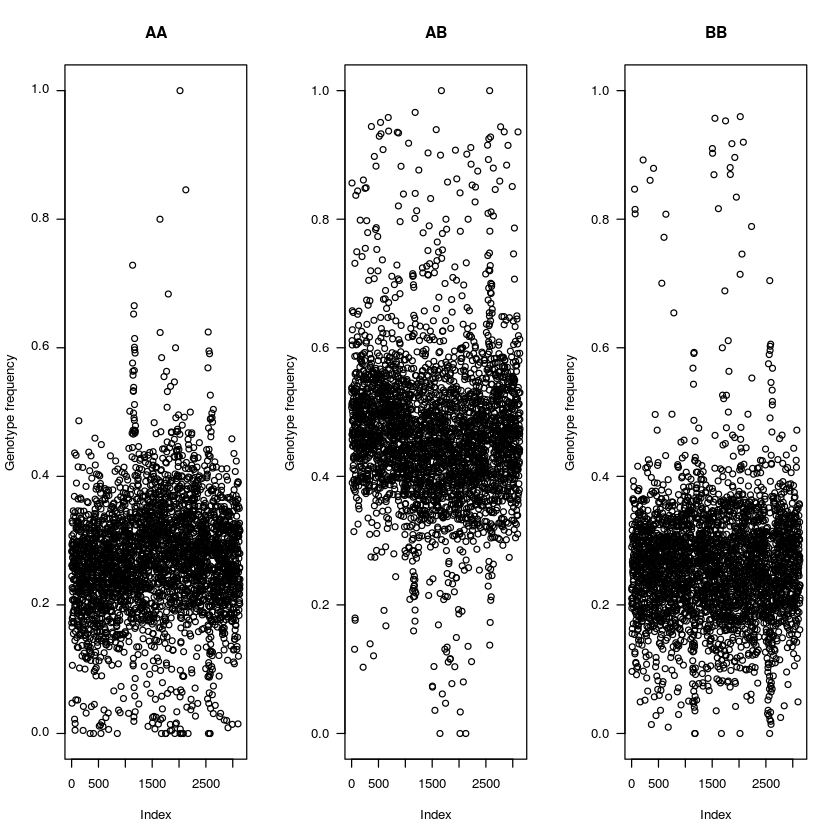

In [25]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

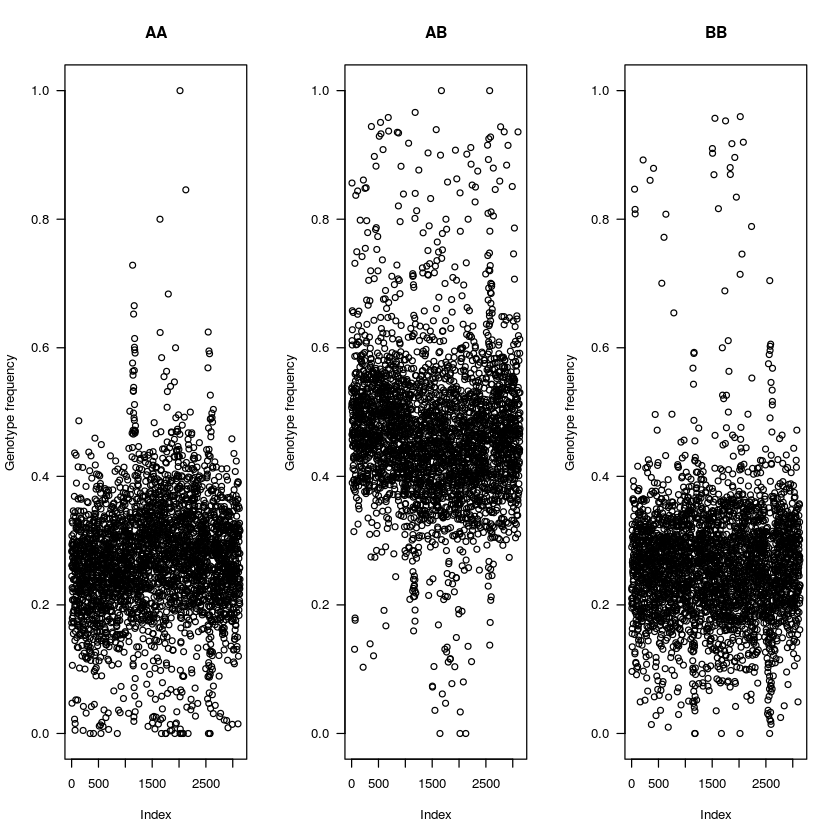

In [26]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [30]:
### do not filter for gfreq

In [31]:
#id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [32]:
#datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [27]:
datf2.4 <- datf2.3

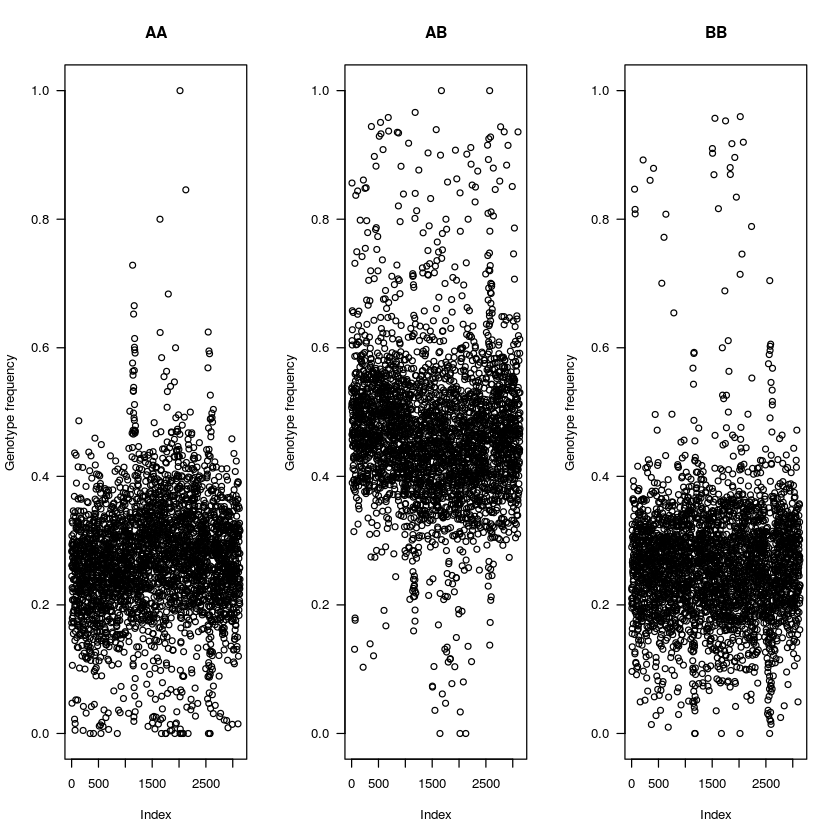

In [28]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [29]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

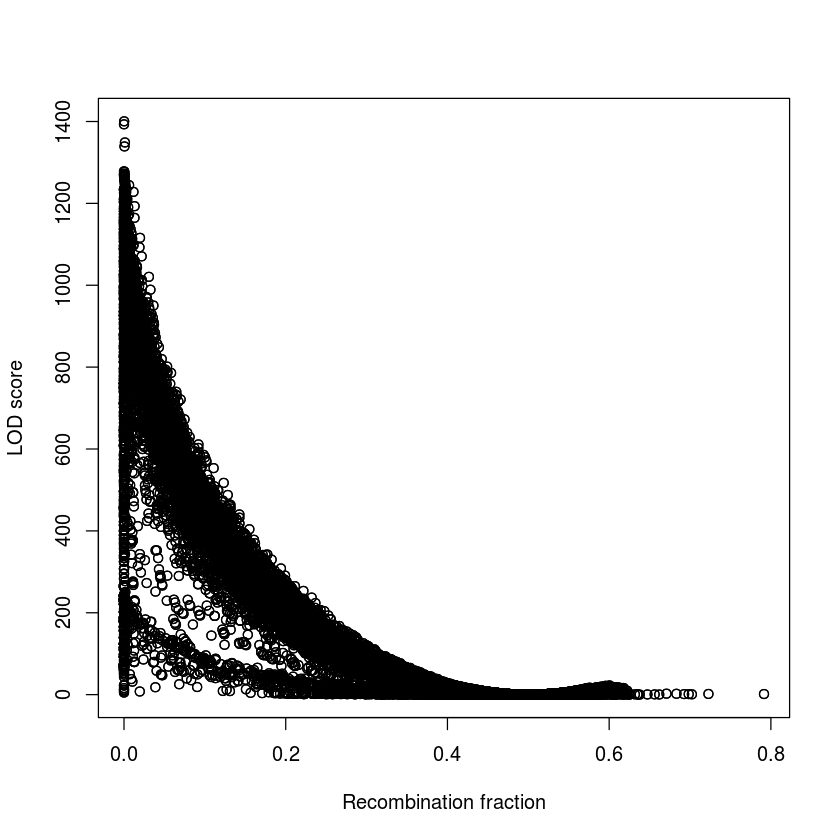

In [30]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

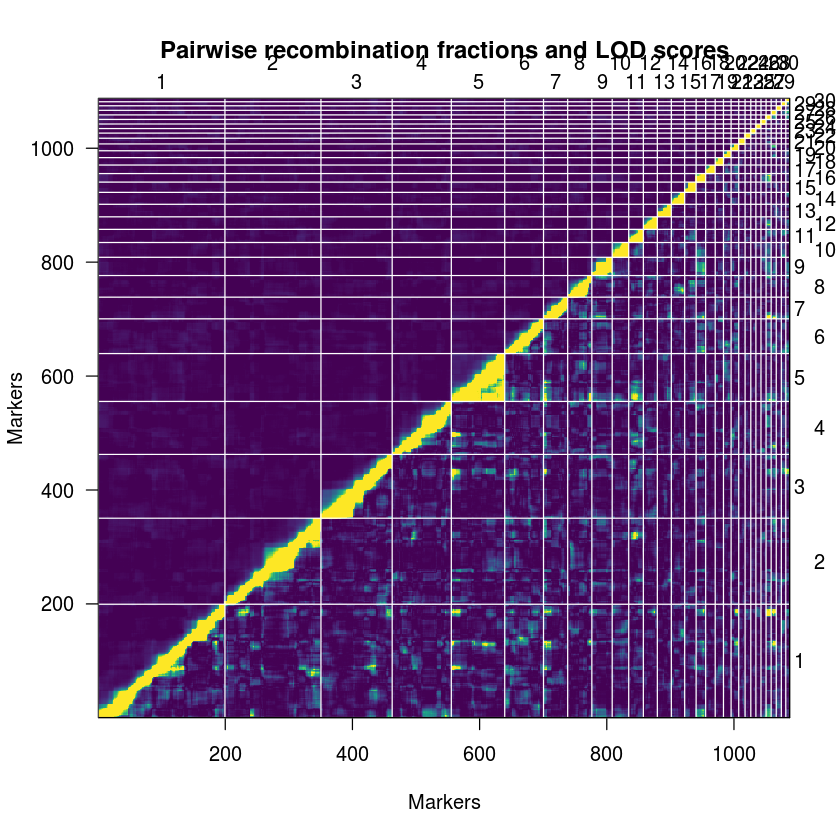

In [31]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [38]:
# maybe skip estimating the map for now?

#genmap <- est.map(datf2.4, error.prob=0.005)

In [39]:
#summaryMap(genmap)

In [40]:
#plotMap(genmap)

In [41]:
#datf2.4 <- replace.map(datf2.4, genmap)

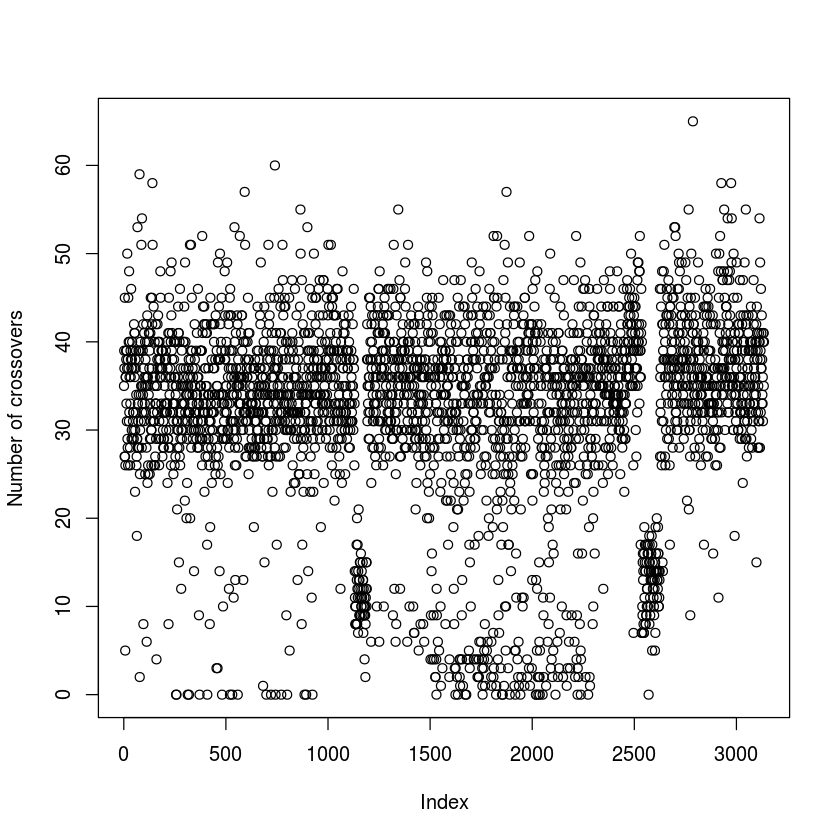

[1] 32.06316

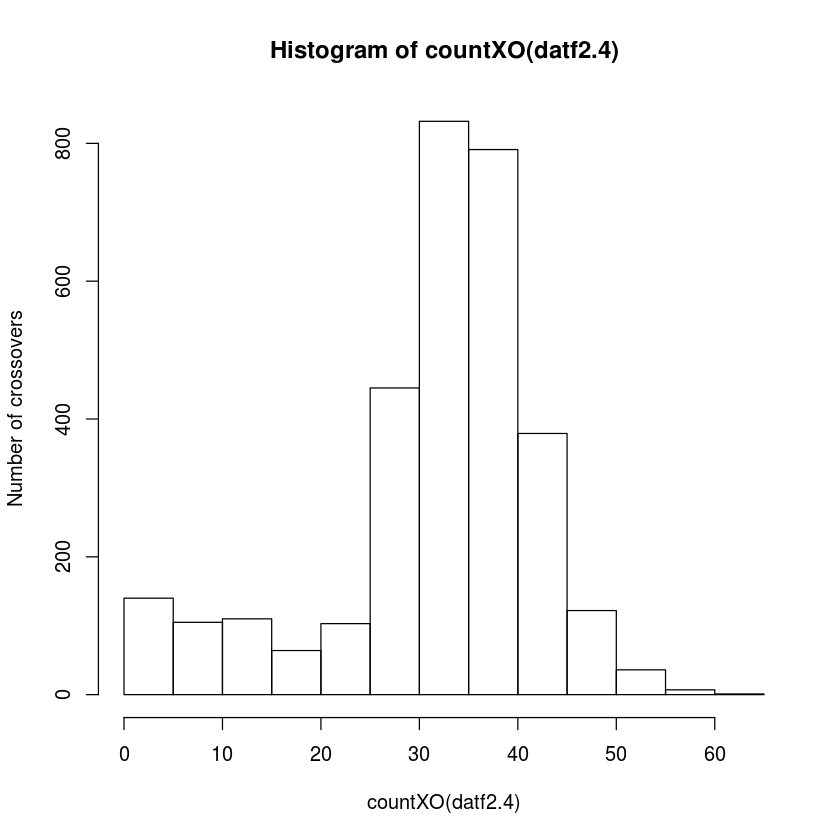

In [32]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [33]:
datf2.5 <- datf2.4

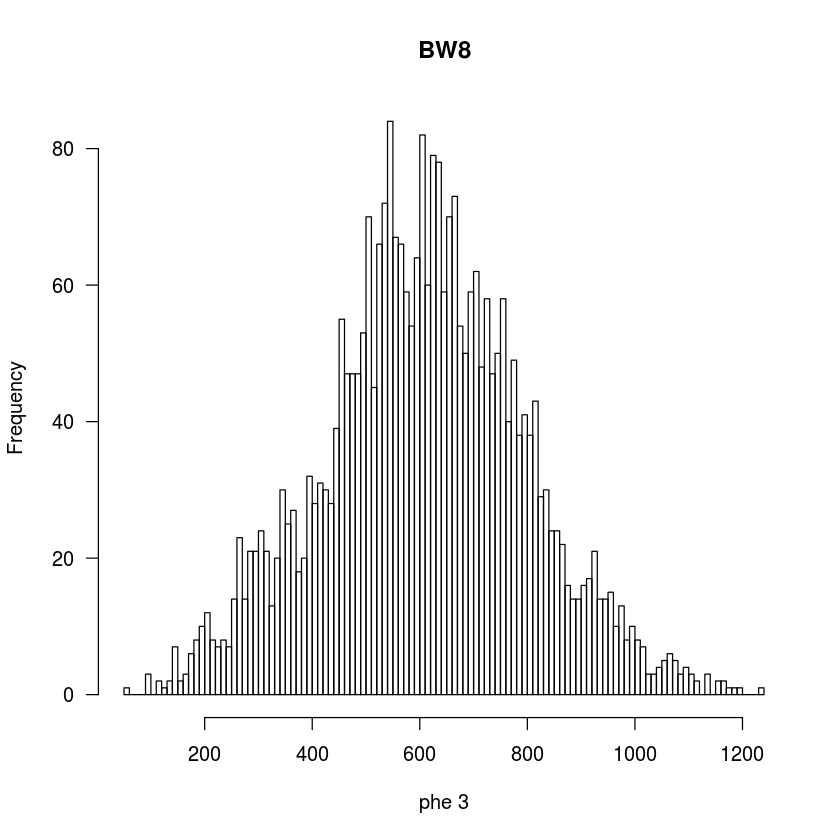

In [34]:
plotPheno(datf2.5, pheno.col=3)

In [45]:
#plotMissing(datf2.5, reorder=TRUE)

In [106]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [107]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [37]:
out.em <- scanone(datf2.5, pheno.col = 3)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 62 individuals with missing phenotypes.
”

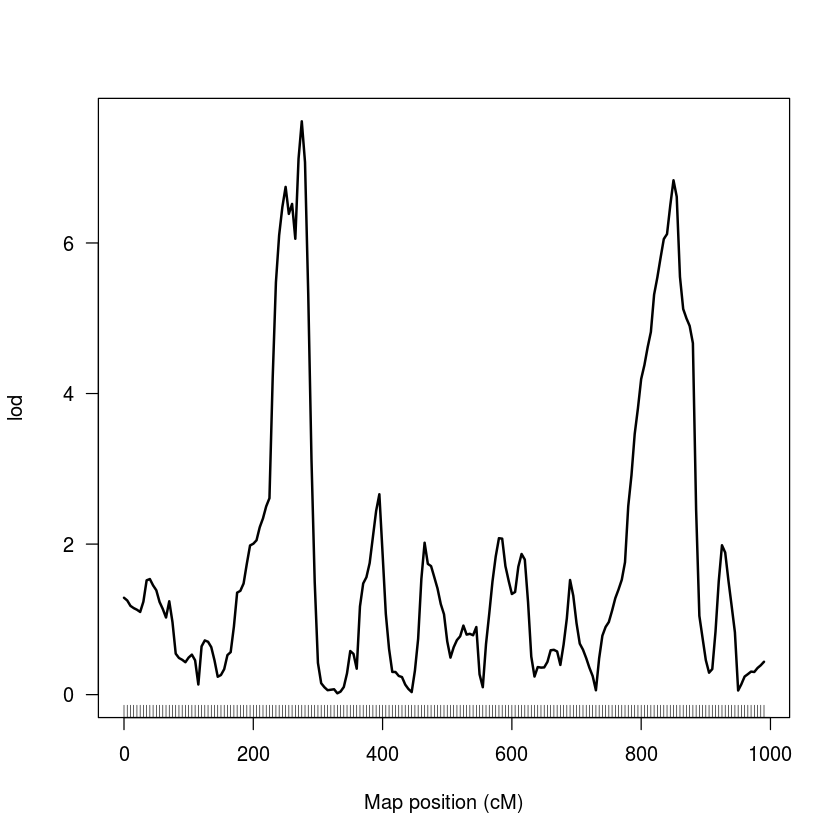

In [38]:
plot(out.em, chr=1)

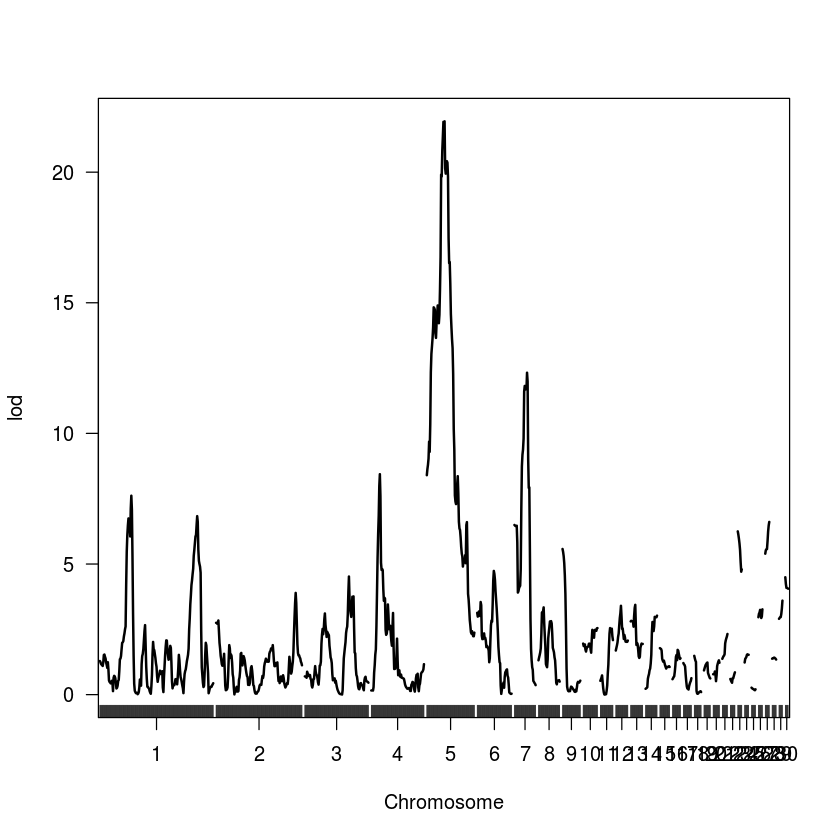

In [39]:
plot(out.em)

In [40]:
ac <- pull.pheno(datf2.5, c("SEX"))

In [41]:
ac2 <- pull.pheno(datf2.5, c("SEX","GENERATION"))

In [42]:
ac3 <- pull.pheno(datf2.5, c("SEX","GENERATION","DAM"))

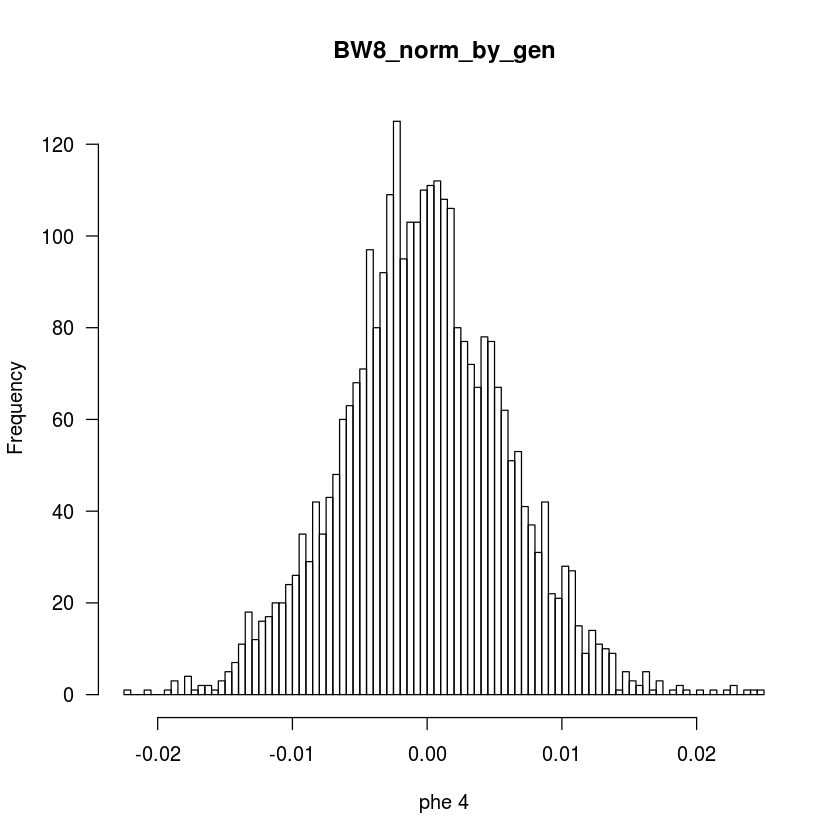

In [113]:
plotPheno(datf2.5, pheno.col = 4)

In [43]:
out.acovar <- scanone(datf2.5, pheno.col = 3, addcovar=ac2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 62 individuals with missing phenotypes.
”

In [44]:
out.acovar3 <- scanone(datf2.5, pheno.col = 3, addcovar=ac3)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 62 individuals with missing phenotypes.
”Warning message in scanone(datf2.5, pheno.col = 3, addcovar = ac3):
“X'X matrix is singular.”Warning message in scanone(datf2.5, pheno.col = 3, addcovar = ac3):
“X'X matrix is singular.”Warning message in scanone(datf2.5, pheno.col = 3, addcovar = ac3):
“X'X matrix is singular.”Warning message in scanone(datf2.5, pheno.col = 3, addcovar = ac3):
“X'X matrix is singular.”Warning message in scanone(datf2.5, pheno.col = 3, addcovar = ac3):
“X'X matrix is singular.”Warning message in scanone(datf2.5, pheno.col = 3, addcovar = ac3):
“X'X matrix is singular.”Warning message in scanone(datf2.5, pheno.col = 3, addcovar = ac3):
“X'X matrix is singular.”Warning message in scanone(datf2.5, pheno.col = 3, addcovar = ac3):
“X'X matrix is singular.”Warning message in scanone(datf2.5, pheno.col = 3, addcovar = ac3):
“X'X matrix is singular.”Warning message in scanone(da

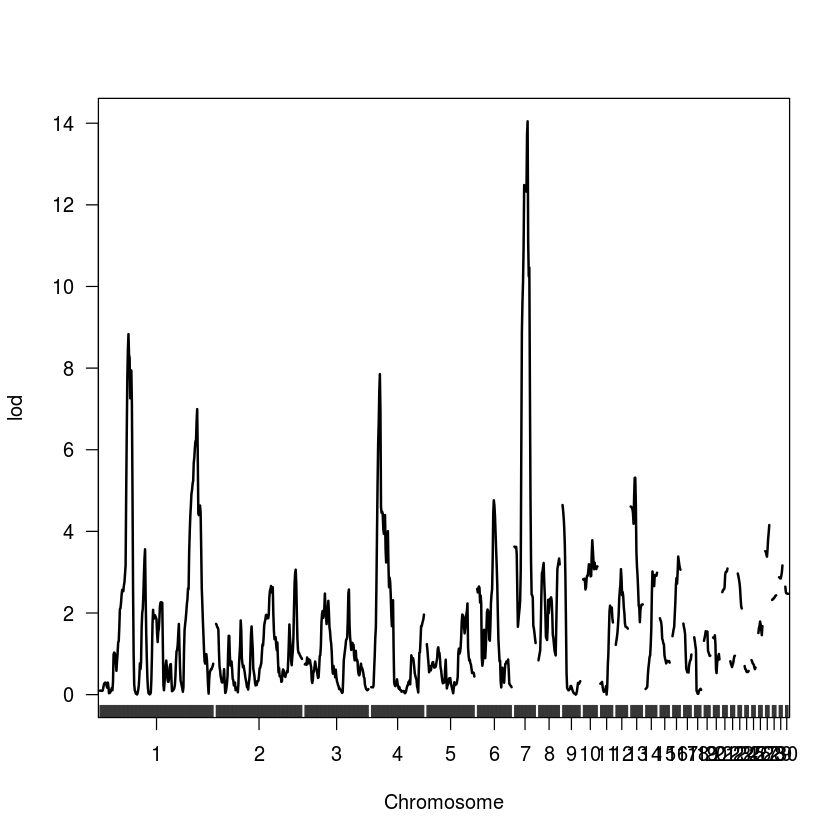

In [45]:
plot(out.acovar)

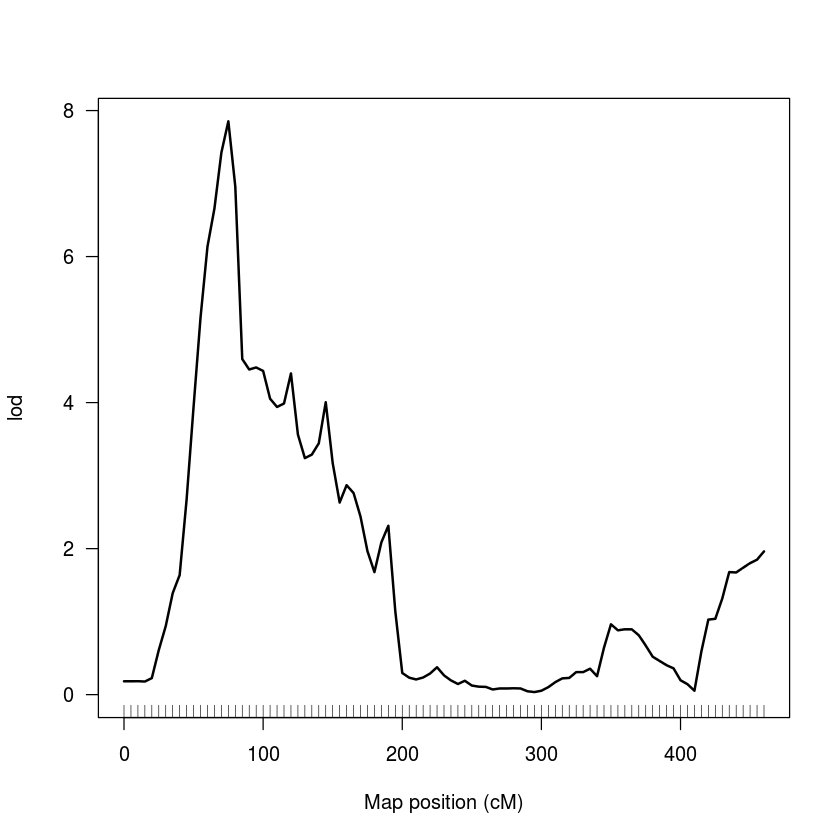

In [46]:
plot(out.acovar, chr=4)

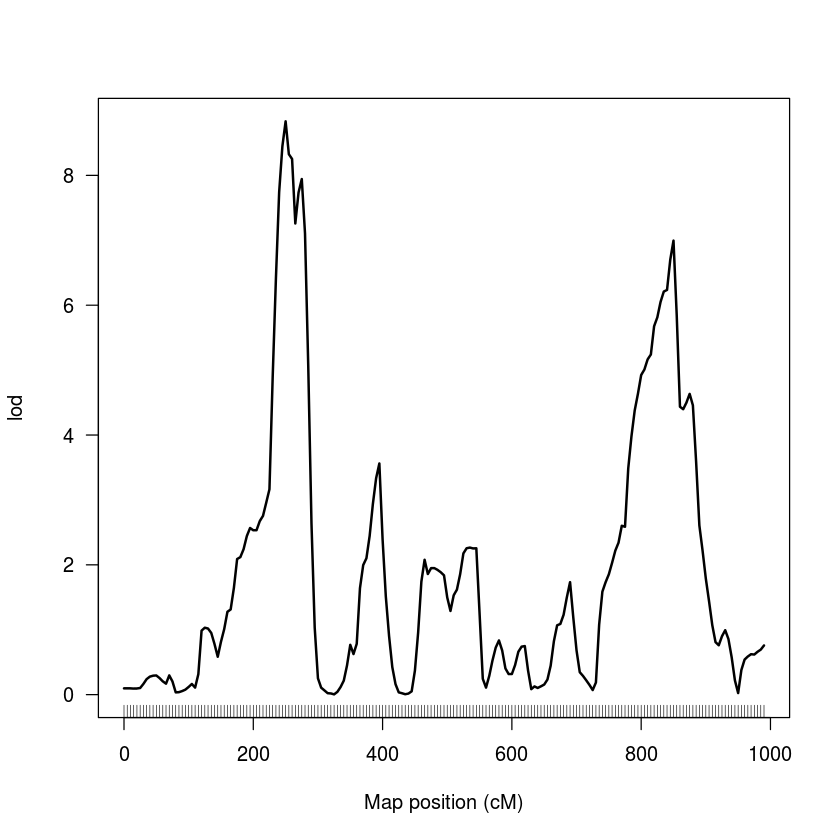

In [47]:
plot(out.acovar, chr=1)

In [48]:
out.acovar3 <- scanone

In [49]:
#out.acovar_perm <- scanone(datf2.5, pheno.col = 3, addcovar=ac2, n.perm = 10000)

ERROR: Error in summary(out.acovar_perm): object 'out.acovar_perm' not found


In [69]:
write.csv(out.acovar_perm, "20200828_out_all_nodensfilter_xo3mb_fill_3mb_wscomposite_bs1e6_res10kb_em_bw8_ctrlsex_ctrlgen_PERM.csv")

In [63]:
write.csv(out.acovar, "20200826_out_all_nodensfilter_xo3mb_fill_3mb_wscomposite_bs1e6_res10kb_em_bw8_ctrlsex_ctrlgen.csv")

In [ ]:
plot(out.acovar, chr = 4)

In [ ]:
out.acovar_2d <- scantwo(datf2.5, pheno.col = 3, addcovar=ac2)

In [ ]:
plot(out.acovar_2d)

In [51]:
save.image(file = "202000910_nodens.Rdata")

In [52]:
F2 = datf2.5$pheno['GENERATION'] ==2
F3 = datf2.5$pheno['GENERATION'] ==3
F4 = datf2.5$pheno['GENERATION'] ==4
F5 = datf2.5$pheno['GENERATION'] ==5
F6 = datf2.5$pheno['GENERATION'] ==6
F7 = datf2.5$pheno['GENERATION'] ==7
F8 = datf2.5$pheno['GENERATION'] ==8
F9 = datf2.5$pheno['GENERATION'] ==9
F10 = datf2.5$pheno['GENERATION'] ==10
F11 = datf2.5$pheno['GENERATION'] ==11
F13 = datf2.5$pheno['GENERATION'] ==13
F14 = datf2.5$pheno['GENERATION'] ==14
F15 = datf2.5$pheno['GENERATION'] ==15

In [53]:
F2subs = subset(datf2.5, ind = F2)
F8subs = subset(datf2.5, ind = F8)
F15subs = subset(datf2.5, ind = F15)

In [54]:
acF8 <- pull.pheno(F8subs, c("SEX"))
acF2 <- pull.pheno(F2subs, c("SEX"))
acF15 <- pull.pheno(F15subs, c("SEX"))

In [55]:
out.acovar.F8 <- scanone(F8subs, pheno.col = 3, addcovar=acF8)
out.acovar.F2 <- scanone(F2subs, pheno.col = 3, addcovar=acF2)
out.acovar.F15 <- scanone(F15subs, pheno.col = 3, addcovar=acF15)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 3 individuals with missing phenotypes.
”Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 55 individuals with missing phenotypes.
”

In [ ]:
F3subs = subset(datf2.5, ind = F3)
F4subs = subset(datf2.5, ind = F4)
F5subs = subset(datf2.5, ind = F5)

In [ ]:
acF3 <- pull.pheno(F3subs, c("SEX"))
acF4 <- pull.pheno(F4subs, c("SEX"))
acF5 <- pull.pheno(F5subs, c("SEX"))

In [ ]:
out.acovar.F3 <- scanone(F3subs, pheno.col = 3, addcovar=acF3)
out.acovar.F4 <- scanone(F4subs, pheno.col = 3, addcovar=acF4)
out.acovar.F5 <- scanone(F5subs, pheno.col = 3, addcovar=acF5)

In [ ]:
plot(out.acovar.F2,out.acovar.F3,out.acovar.F8, chr=4)

In [1]:
load("202000910_nodens.Rdata")

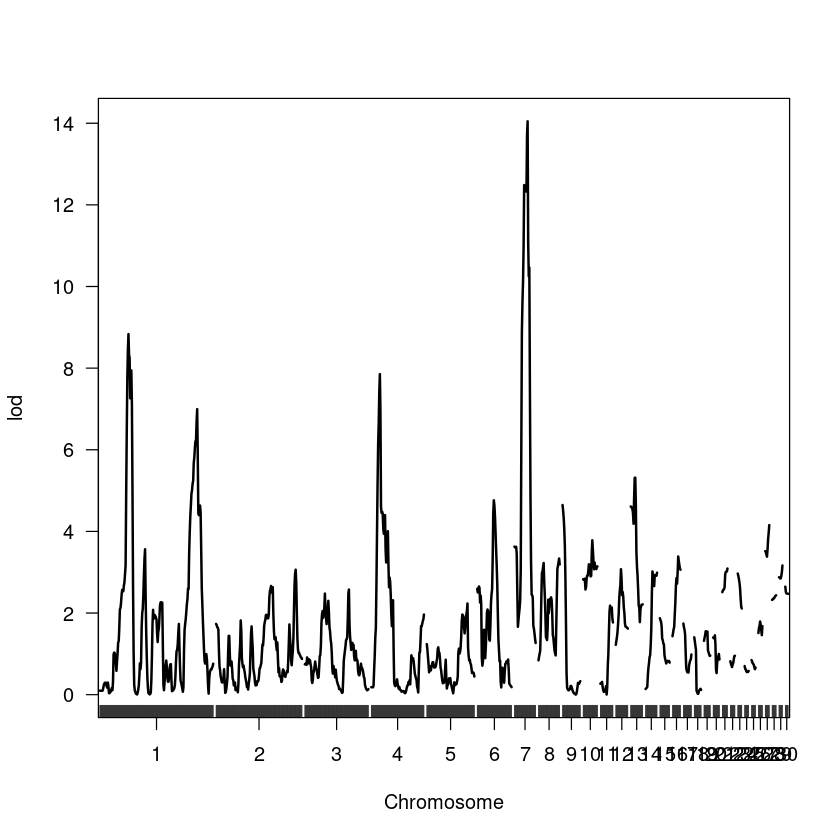

In [3]:
plot(out.acovar)

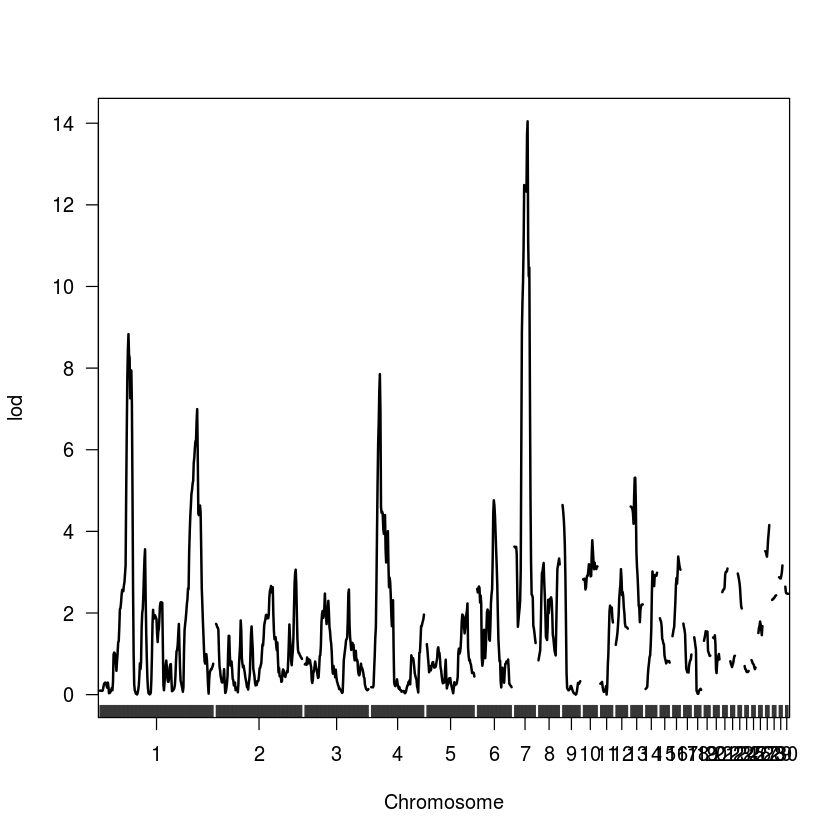

In [118]:
plot(out.acovar)

In [99]:
max(out.acovar[out.acovar$chr==27 & out.acovar$pos > 0  ,])


,chr,pos,lod
27-7,27,35,4.154862


In [101]:
chrs = c(1,1,4,6,7,9,10,13,27)
pos = c(250,850,75,145,115,5,80,40,35)

In [109]:
qtls <- makeqtl(datf2.5, chr = chrs, pos = pos, what = 'prob')

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”

In [103]:
formula(out.acovar)

chr ~ pos + lod

In [117]:
fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2)

Warning message in fitqtl(datf2.5, pheno.col = 3, qtl = qtls, covar = ac2):
“The qtl object doesn't contain imputations; using method="hk".”Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”

$result.full
        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model   20  23861787 1193089.34 166.6662 22.10158            0         0
Error 3052  84102400   27556.49       NA       NA           NA        NA
Total 3072 107964187         NA       NA       NA           NA        NA

$result.drop
           df Type III SS        LOD       %var    F value Pvalue(Chi2)
1@250.0     2    903187.2   7.127950  0.8365619  16.387923 7.448173e-08
1@850.0     2    794356.0   6.273079  0.7357588  14.413231 5.332383e-07
4@75.0      2    620466.3   4.904893  0.5746964  11.258080 1.244821e-05
6@145.0     2    470880.2   3.725683  0.4361448   8.543908 1.880687e-04
7@115.0     2   1568502.9  12.330343  1.4527993  28.459776 4.674039e-13
9@5.0       2    468706.4   3.708532  0.4341314   8.504466 1.956447e-04
10@80.0     2    321514.8   2.546130  0.2977976   5.833740 2.843609e-03
13@40.0     2    431667.9   3.416222  0.3998250   7.832418 3.835115e-04
27@35.0     2    417285.4   3.302

In [115]:
fitqtl(datf2.5, pheno.col = 4, qtl = qtls, covar = data.frame(ac))

Warning message in fitqtl(datf2.5, pheno.col = 4, qtl = qtls, covar = data.frame(ac)):
“The qtl object doesn't contain imputations; using method="hk".”Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 62 individuals with missing phenotypes.
”Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”

$result.full
        df         SS           MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model   19 0.02505488 1.318678e-03 166.1056 22.03611            0         0
Error 3053 0.08864431 2.903515e-05       NA       NA           NA        NA
Total 3072 0.11369919           NA       NA       NA           NA        NA

$result.drop
        df  Type III SS         LOD        %var    F value Pvalue(Chi2)
1@250.0  2 6.281231e-04   4.7116891  0.55244291  10.816599 1.942276e-05
1@850.0  2 1.316283e-03   9.8358217  1.15768904  22.667062 1.459414e-10
4@75.0   2 4.185742e-04   3.1435120  0.36814176   7.208060 7.186014e-04
6@145.0  2 3.898996e-04   2.9286363  0.34292207   6.714269 1.178593e-03
7@115.0  2 1.373926e-03  10.2632547  1.20838639  23.659695 5.454381e-11
9@5.0    2 5.827217e-05   0.4385150  0.05125117   1.003476 3.643217e-01
10@80.0  2 1.248090e-04   0.9388718  0.10977121   2.149274 1.151140e-01
13@40.0  2 3.486037e-04   2.6190596  0.30660170   6.003132 2.404033e-03
27@35.0  2 3.289226e-